In [1]:
#imports libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#imports for acquire and prep
from env import get_db_url
import os
import acquire
import wrangle

# Team Anomaly Detection Project:

This repo is my side of the exploration, in first, answering question #3, and then using our Team's wrangle.py file to do more exploring on finding other anomalies and/or takeaways that might have been overlooked and added to the Codeup email.

#### Pulling in the wrangle dataframe with the acquire file, and then doing simple changes to further the process of answering questions 3.

In [2]:
#calling in acquire function for OG dataset (minimized cleaning/wrangle)
df, df_staff, df_multicohort, df_unimputed, df_non_curriculum, df_outliers=wrangle.full_wrangle()

#### Looking at all of the dataframes:

In [3]:
#looking at df:
df.head(2)

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2018-01-26 09:56:02,1,java-ii,97.105.19.61,Hampton,java-ii,,,,2015-09-22,2016-02-06,1,9,Web Development
2018-01-26 09:56:05,1,java-ii/object-oriented-programming,97.105.19.61,Hampton,java-ii,,object-oriented-programming,,2015-09-22,2016-02-06,1,9,Web Development


In [4]:
#looking at outlier datasets: df_staff (only holds Staff members and their info)
df_staff.head(2)

,date,time,path,user_id,ip,cohort,start_date,end_date,program_id,unit,subunit,lesson,other
166284,2018-12-06,14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,97.105.19.58,Staff,2014-02-04,2014-02-04,2.0,appendix,further-reading,java,intellij-tomcat-configuration
166294,2018-12-06,14:25:40,javascript-i,314,97.105.19.58,Staff,2014-02-04,2014-02-04,2.0,javascript-i,None,None,None


In [5]:
#looking at outlier datasets: df_multicohort (only holds outliers that have multicohorts in data)
df_multicohort.head(2)

,date,time,path,user_id,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id
111,2018-01-26,11:36:00,mkdocs/search_index.json,25,97.105.19.61,Teddy,mkdocs,None,search_index.json,None,2018-01-08,2018-05-17,2.0
124,2018-01-26,11:41:09,javascript-i/functions,25,97.105.19.61,Teddy,javascript-i,None,functions,None,2018-01-08,2018-05-17,2.0


In [6]:
#looking at outlier datasets: df_unimputed (only holds df w/o imputes)
df_unimputed.head(2)

,user_id,date,time,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id
965,54,2018-01-28,23:42:55,/,24.160.159.122,NaN,,None,,None,NaN,NaN,nan
966,54,2018-01-28,23:43:12,spring/extra-features,24.160.159.122,NaN,spring,None,extra-features,None,NaN,NaN,nan


In [7]:
#looking at outlier datasets: df_non_curriculum (only holds outliers with no lessons)
df_non_curriculum.head(2)

,user_id,date,time,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id
0,1,2018-01-26,09:55:03,/,97.105.19.61,Hampton,,None,,None,2015-09-22,2016-02-06,1.0
12,6,2018-01-26,10:00:37,/,97.105.19.61,Teddy,,None,,None,2018-01-08,2018-05-17,2.0


In [8]:
#looking at outlier datasets: df_outliers (only holds datasets that were seen as outliers)
df_outliers.head(2)

,user_id,date,time,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id
6,3,2018-01-26,09:56:46,javascript-i/conditionals,97.105.19.61,Teddy,javascript-i,None,conditionals,None,2018-01-08,2018-05-17,2.0
7,3,2018-01-26,09:56:48,javascript-i/functions,97.105.19.61,Teddy,javascript-i,None,functions,None,2018-01-08,2018-05-17,2.0


#### Sorting WebDev and DS into different objects to explore:

In [9]:
#splitting webdev and datascience into two different df:
wd = df[df.program_type != 'Data Science']
ds = df[df.program_type == 'Data Science']

In [10]:
df.dtypes

user_id                  int64
path                    object
ip                      object
cohort                  object
unit                    object
subunit                 object
lesson                  object
other                   object
start_date      datetime64[ns]
end_date        datetime64[ns]
program_id                int8
hour                     int64
program_type            object
dtype: object

In [11]:
#active_programtypes_KDE()

#### Showing students that were actively accessing the curriculum during their cohort dates:

In [12]:
#splitting cohorts into program types:
#Ray's code to filter dataframe for time where students are active during their programs
# Filter dataframe for the time when student were 'active' for each program
active_wd = wd.loc[(wd.index >= wd.start_date) & (wd.index <= wd.end_date)]
active_ds = ds.loc[(ds.index >= ds.start_date) & (ds.index <= ds.end_date)]

In [13]:
#number of active wb students compared to ds students:
print(f'Number of active WebDev students during their cohort dates:', active_wd.value_counts().sum())
print(f'Number of active DataScience students during their cohort dates:', active_ds.value_counts().sum())

Number of active WebDev students during their cohort dates: 385855
Number of active DataScience students during their cohort dates: 51665


In [14]:
#creating a function to run other dfs through, to check what active ds students are missing...
#def lost_ds(df):
    #wd = df[df.program_type != 'Data Science']
    #ds = df[df.program_type == 'Data Science']
    #active_wd = wd.loc[(wd.index >= wd.start_date) & (wd.index <= wd.end_date)]
    #active_ds = ds.loc[(ds.index >= ds.start_date) & (ds.index <= ds.end_date)]
    #number of active wb students compared to ds students:
    #print(f'Number of active WebDev students during their cohort dates:', active_wd.value_counts().sum())
    #print(f'Number of active DataScience students during their cohort dates:', active_ds.value_counts().sum())

__________________________________________

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
Active students that do not engage with curriculum?

user_id frequency counts
current dates of cohorts
ip addresses?

### Active Students with low curriculum access during each program:

#### WEB DEV:

In [15]:
#webdev students with lowest log access count:
hardly_access_wd = active_wd.groupby('user_id').size().sort_values().head(20)
hardly_access_wd

user_id
278     3
340    13
963    15
41     22
371    24
529    29
967    30
978    32
36     36
57     42
543    43
56     44
45     51
46     51
975    59
969    60
65     63
33     63
250    63
253    71
dtype: int64

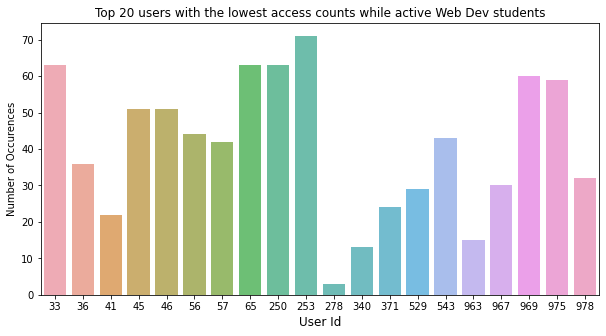

In [57]:
#histogram of these users under 20 logged access dates:
user_id_count = active_wd.groupby('user_id').size().sort_values()
user_id_count = user_id_count[:20]
plt.figure(figsize=(10,5))
sns.barplot(user_id_count.index, user_id_count.values, alpha=0.8)
plt.title ('Top 20 users with the lowest access counts while active Web Dev students')
plt.ylabel('Number of Occurences')
plt.xlabel('User Id', fontsize=12)
plt.show()

# Data Science:

In [17]:
#looking at ds active students that had lowest curriculum log access counts
hardly_access_ds = active_ds.groupby('user_id').size().sort_values().head(20)
hardly_access_ds

user_id
902    118
780    145
577    190
901    201
683    205
914    235
897    241
949    288
846    288
910    313
477    327
907    328
693    345
896    354
575    355
583    356
470    365
587    372
908    386
616    401
dtype: int64

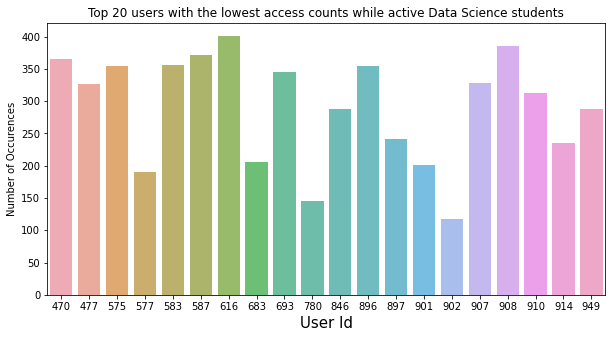

In [58]:
#histogram of these 3 users under 114 access logs on curriculum:
user_id_count1 = active_ds.groupby('user_id').size().sort_values()
user_id_count1 = user_id_count1[:20]
plt.figure(figsize=(10,5))
sns.barplot(user_id_count1.index, user_id_count1.values, alpha=0.8)
plt.title ('Top 20 users with the lowest access counts while active Data Science students')
plt.ylabel('Number of Occurences')
plt.xlabel('User Id', fontsize=15)
plt.show()

#### Putting cohorts side-by-side:

In [19]:
def active_programtypes_KDE():
    plt.figure(figsize = (12, 7))

    sns.kdeplot(active_wd, label = 'WebDev students access counts', shade = True, color = 'r')
    sns.kdeplot(active_ds, label = 'DS students access counts', shade = True, color = 'b')

    plt.xlabel('Active Students log access counts')

_______________________________________________

## Answers to Questions:
#### Overall, DataScience students are accessing their curriculum's website more times than WebDev.
    - Do DS teachers teach more from the curriculum?
    - What do exercises in the curriculum and lessons look like for each program type?

## Takeaways and further Questions needed:

1) Was there another website with curriculum information that 2018 students had access to?

In [20]:
#minimum date students are accessing Codeup website:
df.index.min()

Timestamp('2018-01-26 09:56:02')

<b>Some of the students that have a 'low' access log count might actually also being using another curriculum, if there was one available.</b>

One example of this is student #278.

This WebDev student only had 3 showing log counts during their cohort's active period, however after the cohort this student made 60 more log counts after their end date.

One of two things:
- Students/Alumni's are utilizing curriculum (some more so) after graduating
- This could also be a web scrapping case!

In [21]:
df[df.user_id == 278]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2018-09-27 14:47:37,278,java-ii/arrays,107.77.217.9,Voyageurs,java-ii,,arrays,,2018-05-29,2018-10-11,2,14,Web Development
2018-09-27 14:58:48,278,java-ii/arrays,107.77.217.9,Voyageurs,java-ii,,arrays,,2018-05-29,2018-10-11,2,14,Web Development
2018-09-27 14:59:07,278,java-ii/collections,107.77.217.9,Voyageurs,java-ii,,collections,,2018-05-29,2018-10-11,2,14,Web Development
2018-10-16 18:56:02,278,javascript-ii,67.11.175.66,Voyageurs,javascript-ii,,,,2018-05-29,2018-10-11,2,18,Web Development
2018-10-16 18:56:22,278,javascript-ii/es6,67.11.175.66,Voyageurs,javascript-ii,,es6,,2018-05-29,2018-10-11,2,18,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-09 17:31:50,278,mysql/introduction,67.11.175.66,Voyageurs,mysql,,introduction,,2018-05-29,2018-10-11,2,17,Web Development
2019-02-09 17:35:43,278,mysql/tables,67.11.175.66,Voyageurs,mysql,,tables,,2018-05-29,2018-10-11,2,17,Web Development
2019-02-09 17:37:19,278,mysql/basic-statements,67.11.175.66,Voyageurs,mysql,,basic-statements,,2018-05-29,2018-10-11,2,17,Web Development


In [22]:
#example of a possible student that dropped out of course or another web scraper?
df[df.user_id == 340]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2019-01-22 16:49:49,340,html-css,97.105.19.58,Zion,html-css,,,,2019-01-22,2019-06-04,2,16,Web Development
2019-01-22 16:50:48,340,html-css/introduction,97.105.19.58,Zion,html-css,,introduction,,2019-01-22,2019-06-04,2,16,Web Development
2019-01-22 16:51:13,340,html-css/elements,97.105.19.58,Zion,html-css,,elements,,2019-01-22,2019-06-04,2,16,Web Development
2019-01-22 16:51:18,340,javascript-i,97.105.19.58,Zion,javascript-i,,,,2019-01-22,2019-06-04,2,16,Web Development
2019-01-22 16:51:32,340,html-css,97.105.19.58,Zion,html-css,,,,2019-01-22,2019-06-04,2,16,Web Development
2019-01-22 16:51:36,340,html-css/introduction,97.105.19.58,Zion,html-css,,introduction,,2019-01-22,2019-06-04,2,16,Web Development
2019-01-22 16:51:53,340,html-css/css-ii/media-queries,97.105.19.58,Zion,html-css,css-ii,media-queries,,2019-01-22,2019-06-04,2,16,Web Development
2019-01-22 16:52:22,340,html-css/css-ii/grids,97.105.19.58,Zion,html-css,css-ii,grids,,2019-01-22,2019-06-04,2,16,Web Development
2019-01-22 16:52:39,340,html-css/css-ii/bootstrap-introduction,97.105.19.58,Zion,html-css,css-ii,bootstrap-introduction,,2019-01-22,2019-06-04,2,16,Web Development


2) Does Codeup recycle their user_ids at all?

In [23]:
#user_id to cohort: are there student ranges here?
#sns.barplot(data=df, x=df.user_id, y=df.index, hue=df.program_id)

_________________________________________________

#### User_id examples of users that went from student to staff

In [24]:
#who dis? 
df[df.user_id == 53]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,
2018-01-28 18:48:19,53,index.html,67.10.161.55,Lassen,index.html,,,,2016-07-18,2016-11-10,1,18,Web Development
2018-01-28 18:48:24,53,html-css,67.10.161.55,Lassen,html-css,,,,2016-07-18,2016-11-10,1,18,Web Development
2018-01-28 18:49:20,53,javascript-i,67.10.161.55,Lassen,javascript-i,,,,2016-07-18,2016-11-10,1,18,Web Development
2018-01-28 18:49:23,53,javascript-i/conditionals,67.10.161.55,Lassen,javascript-i,,conditionals,,2016-07-18,2016-11-10,1,18,Web Development
2018-01-28 18:50:41,53,javascript-i/conditionals,67.10.161.55,Lassen,javascript-i,,conditionals,,2016-07-18,2016-11-10,1,18,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-22 13:33:12,53,spring/fundamentals/form-model-binding,97.105.19.58,Lassen,spring,fundamentals,form-model-binding,,2016-07-18,2016-11-10,1,13,Web Development
2020-01-23 09:47:35,53,index.html,97.105.19.58,Lassen,index.html,,,,2016-07-18,2016-11-10,1,9,Web Development
2020-01-23 09:47:41,53,java-ii,97.105.19.58,Lassen,java-ii,,,,2016-07-18,2016-11-10,1,9,Web Development


In [25]:
#This last user_id had nulls. When following it, this shows that possible nulls might be when students are
#going through their prework phase at Codeup...good to know for another time...
df[df.user_id == 88]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


Looking at each of these students to learn more:

In [26]:
#user 95 (wondering if this is a webscraper? start date and access dates do not make sense)
df[df.user_id == 95]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [27]:
#user 679: maybe they quit??
df[df.user_id == 679]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [28]:
#user 71 : access dates and start_date do not coincide..
df[df.user_id == 71]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [29]:
#user 246 : looks like webscaper | odd sign-in times and access/start dates do not match
df[df.user_id == 246]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [30]:
#user 399: pathways and quick scan times look like a webscraper
df[df.user_id == 399]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [31]:
#user 956: looks like a student that my have dropped out
df[df.user_id == 956]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [32]:
#user 539: student that dropped?
df[df.user_id == 539]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [33]:
#user 216: possible web scraper?
df[df.user_id == 216]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [34]:
#user 177: path would indicate web scrap (images and favicon only)
df[df.user_id == 177]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [35]:
#user 81: path would indicate web scrap (html and css only)
df[df.user_id == 81]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [36]:
#user 169: looks like web scraper
df[df.user_id == 169]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [37]:
#user 85: looks like a past possible student that dropped out or never started
df[df.user_id == 85]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [38]:
#user 832: student that didn't interact with curriculum??
df[df.user_id == 832]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [39]:
#user 97: web scraper
df[df.user_id == 97]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [40]:
#user 857: probably student that dropped out
df[df.user_id == 857]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [41]:
#user 348: probably web scraper
df[df.user_id == 348]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [42]:
#user 212: probably web scraper or maybe a past student?? (is there much info from 2014?)
df[df.user_id == 212]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [43]:
#user 593: probably web scraper 
df[df.user_id == 593]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


In [44]:
#user 165: probably web scraper 
df[df.user_id == 165]

,user_id,path,ip,cohort,unit,subunit,lesson,other,start_date,end_date,program_id,hour,program_type
accessed,,,,,,,,,,,,,


#### Creating objects based on exploration of these students:

In [45]:
#creating object of known dropped students:
df_drop_students = df[df.user_id == 85],df[df.user_id == 956]

In [46]:
#info together:
df_drop_students

(Empty DataFrame
 Columns: [user_id, path, ip, cohort, unit, subunit, lesson, other, start_date, end_date, program_id, hour, program_type]
 Index: [],
 Empty DataFrame
 Columns: [user_id, path, ip, cohort, unit, subunit, lesson, other, start_date, end_date, program_id, hour, program_type]
 Index: [])

In [47]:
#creating object of known web scrapers:
web_scrapes = df[df.user_id == 177],df[df.user_id == 399], df[df.user_id == 246]

In [48]:
#creating object of possible web scrapers:
poss_web_scrapes = df[df.user_id == 165],df[df.user_id == 593], df[df.user_id == 212], df[df.user_id == 348], df[df.user_id == 857],df[df.user_id == 97], df[df.user_id == 832], df[df.user_id == 85], df[df.user_id == 169], df[df.user_id == 81],df[df.user_id == 216]

In [49]:
#creating object of student then staff users:
student_staff = df[df.user_id == 539],df[df.user_id == 64]

In [50]:
#reminding myself of column names:
df.columns

Index(['user_id', 'path', 'ip', 'cohort', 'unit', 'subunit', 'lesson', 'other',
       'start_date', 'end_date', 'program_id', 'hour', 'program_type'],
      dtype='object')

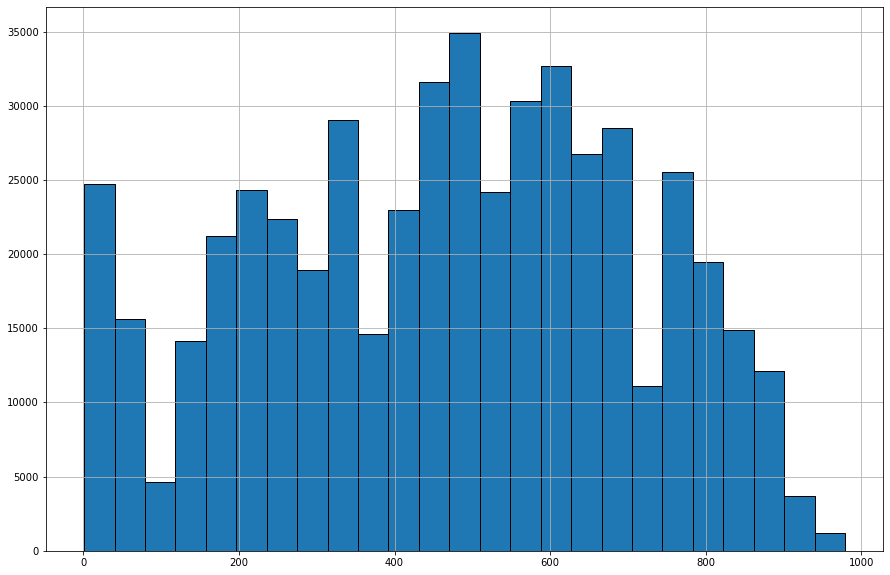

In [51]:
#histograph of user_id counts
df.user_id.hist(figsize=(15, 10),
            ec='black',
            grid=True,
            bins=25);

In [52]:
#sns is having issues with index as it is showing duplicates:
df.index.is_unique

False

In [53]:
#dropping index duplicates
df=df.loc[~df.index.duplicated(), :]

#### Can we look at users' access log times? (help determine any web scrapers)

In [54]:
#adding hour column to df for hours shown:
df['hour'] = pd.to_datetime(df.time).dt.hour
df.head(1)

AttributeError: 'DataFrame' object has no attribute 'time'

In [ ]:
#showing hours these hardly accessed students logged in at:


In [ ]:
#user_id to cohort: are there student ranges here?
sns.histplot(data=df, x=df.user_id, hue=df.program_id, bins=30)

#### Question: Are there overlaps or recycling happening with user_id?

In [ ]:
#user_id to cohort: are there student ranges here?
sns.histplot(data=df, x=df.user_id, hue=df.program_id, bins=60, multiple="stack")

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df.user_id.index, df.program_type.values, alpha=0.8)
plt.title ('Hardly Accessed Data Science Curriculum')
plt.ylabel('Number of Occurences')
plt.xlabel('User Id', fontsize=15)
plt.show()

In [ ]:
#user example of student then staff member
#df[df.user_id ==539]

In [ ]:
#using wrangle code to call in all dataframes and file to call in curriculum_log data:
df, df_staff, df_multicohort, df_unimputed, df_non_curriculum, df_outliers=wrangle.full_wrangle()